Рубежный контроль №1
Носкин Сергей Андреевич ИУ5-63Б Вариант 8

Тема: Технологии разведочного анализа и обработки данных.
Варианты заданий.

Номер варианта - 8
Номер задачи - 1
Номер набора данных, указанного в задаче - 8
Для студентов группы ИУ5-63Б - для произвольной колонки данных построить график "Ящик с усами (boxplot)".

Задача №1.
Для заданного набора данных проведите корреляционный анализ.

В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски.

Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Выполнение:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.shape

(506, 14)

In [7]:
df = df.dropna()

In [8]:
df.shape

(394, 14)

<Axes: >

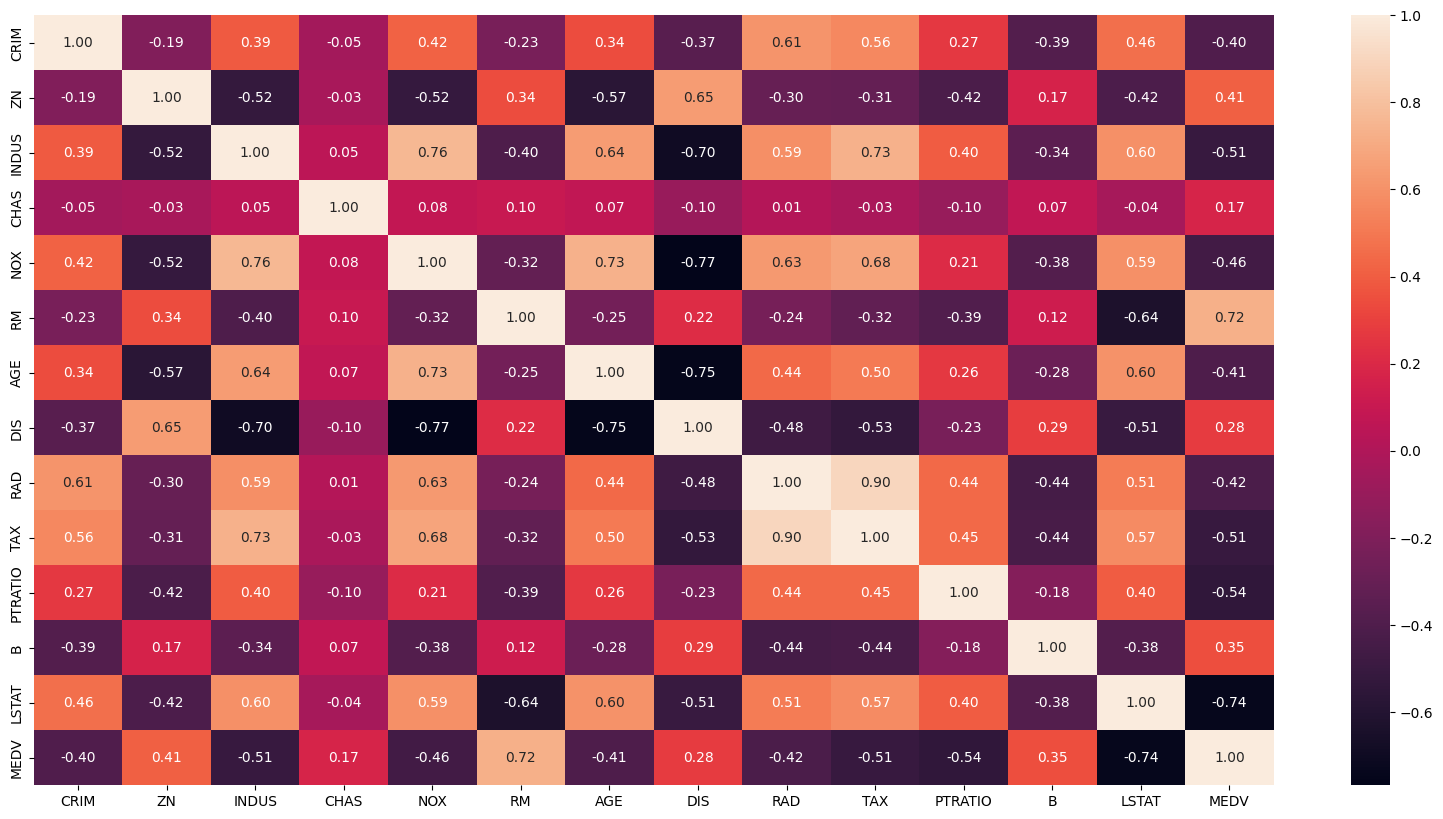

In [9]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Если мы берем в виде целевой критерии MEDV, то с ней хорошо кореллируют: LSTAT, PTRATIO, RM, INDUS and TAX Плохо же кореллируют критерии CHAS and DIS, их можно убрать.

Между собой сильно кореллируют нецелевые категории: NOX and INDUS 0.76 AGE and INDUS 064 AGE and NOX 0.73 DIS and INDUS 0.71 DIS and NOX 0.77 DIS and AGE 0.75 TAX and INDUS 0.72

Таким образом для улучшения работы предсказаний можно удалить (INDUS нельзя, он хорошо кореллирует с целевым), DIS, NOX

Дополнительное задание
Построю график "Ящик с усами (boxplot)" для оценок проверки по категориям риска.

<Axes: xlabel='INDUS', ylabel='CRIM'>

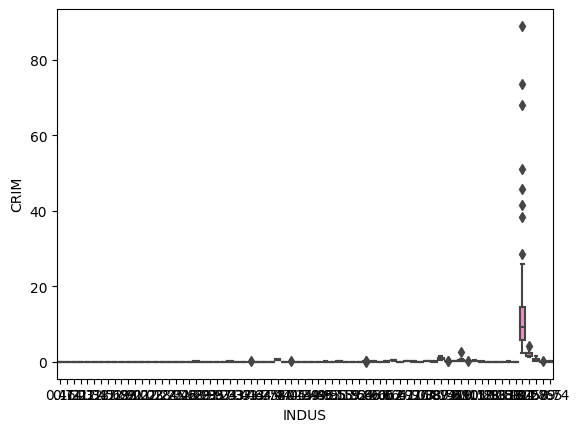

In [12]:
sns.boxplot( x=df["INDUS"], y=df["CRIM"])
